In [1]:
from yaml import load
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

config = load(open('../config/common.yaml').read())
sns.set_context('poster')


In [3]:
clusters = (
    pd.read_parquet('../output/scrnaseq-wf/clusters.parquet')
    .assign(cluster=lambda df: df.cluster.map(config['short_cluster_annot']))
)


In [16]:
def parse(sample, rep_num):
    cnts = (
        pd.read_csv(f'../output/aagag-wf/{sample}.tsv', sep='\t')
        .assign(cell_id=lambda df: f'rep{rep_num}_' + df.cell_id)
        .groupby('cell_id').size()
        .rename('aagag_cnts')
    )
    
    df = (
        pd.concat([cnts, clusters], axis=1)
        .dropna()
        .assign(log_aagag_cnts=lambda df: np.log10(df.aagag_cnts))
    )
    fig = plt.figure(figsize=(10, 8))
    ax = sns.boxplot('cluster', 'log_aagag_cnts', data=df, order=config['short_cluster_order'])
    ax.set_title(sample)



/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



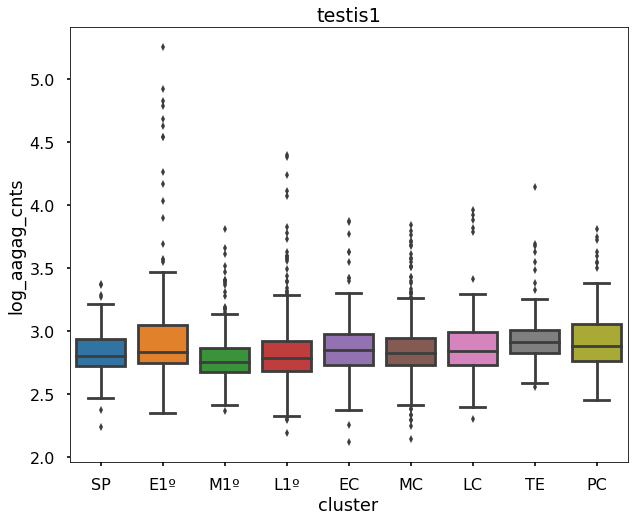

In [17]:
parse('testis1', 1)


/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



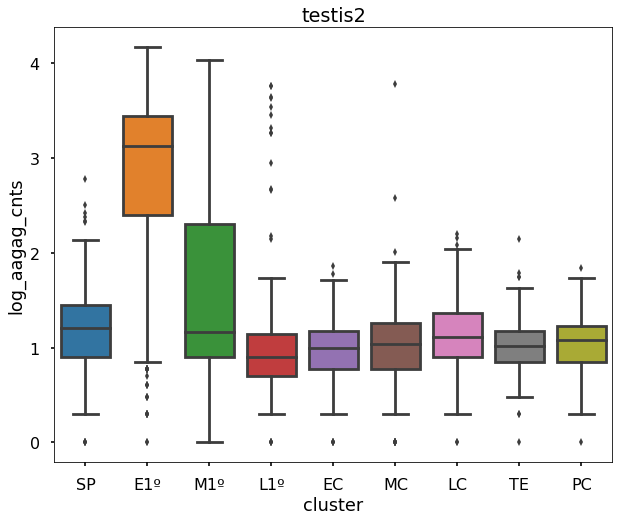

In [18]:
parse('testis2', 2)


/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



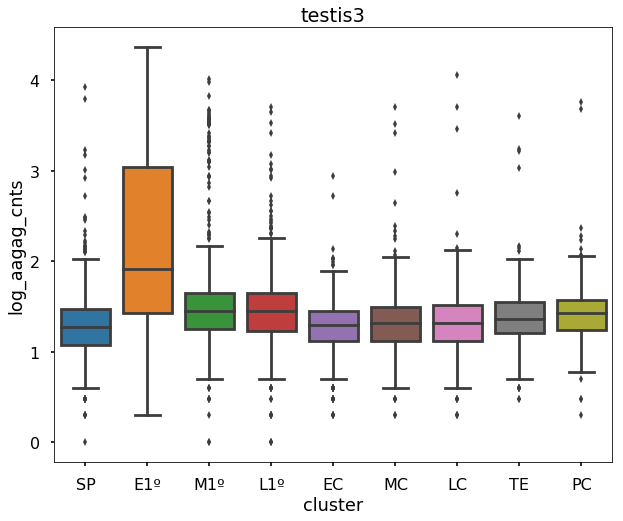

In [19]:
parse('testis3', 3)
